# Assignment 3 - Classification
### CS450 Fall 2022

This assignment contains three problems. 
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

There are demo notebooks in Google Drive that can help you get started.

I did not include any starter code. 

## Don't forget to save a copy of the notebook

Student Names: Dante Viscuso, Brandon Chau


## Problem 1 - Decision Trees (20 points)
* Pull the data from https://archive.ics.uci.edu/ml/datasets/Credit+Approval
* Create a decision tree to determine if credit should be extended based on a test case.
* Grading criteria: 
    * Demonstrate that you evaluated the data set and applied aduquate preprocessing to the data
    * Make sure you comment you code and the cleaning process so we can follow your logic in grading
    * Provide a confusion matrix for your results. Text based is fine.
    * Provide a visualization with explanation that demonstrates logical evaluation of the model
* Actual accuracy can depend on how you split the training and test data and other random variations
    * If you get below 70% accuracy, there may be a problem with your model
* *Spoiler Alert*: If you don't start with some exploration to determine how to approach data cleaning, this will be more difficult than it should be.
    

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#Data Exploration and Analysis

In [2]:
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14' ,'A15', 'A16']
cred = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", na_values='?')
cred.columns = labels
cred.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


In [3]:
cred.describe(include="all")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,677,677.000000,689.000000,683,683,680,680,689.000000,689,689,689.000000,689,689,676.000000,689.000000,689
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,467,NaN,NaN,518,518,137,398,NaN,360,395,NaN,373,624,NaN,NaN,383
mean,NaN,31.569261,4.765631,NaN,NaN,NaN,NaN,2.224819,NaN,NaN,2.402032,NaN,NaN,183.988166,1018.862119,NaN
std,NaN,11.966670,4.978470,NaN,NaN,NaN,NaN,3.348739,NaN,NaN,4.866180,NaN,NaN,173.934087,5213.743149,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.580000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,74.500000,0.000000,NaN
50%,NaN,28.420000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.250000,7.250000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,277.000000,396.000000,NaN


In [4]:
cred.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
# Store the column names for future use
A1_col = cred['A1'].dropna().unique()
A4_col = cred['A4'].dropna().unique()
A5_col = cred['A5'].dropna().unique()
A6_col = cred['A6'].dropna().unique()
A7_col = cred['A7'].dropna().unique()
A13_col = cred['A13'].dropna().unique()

In [6]:
# Store the encoded version of the categorical names for future use
A1_range = np.arange(0,len(A1_col), 1)
A4_range = np.arange(0,len(A4_col), 1)
A5_range = np.arange(0,len(A5_col), 1)
A6_range = np.arange(0,len(A6_col), 1)
A7_range = np.arange(0,len(A7_col), 1)
A13_range = np.arange(0,len(A13_col), 1)

## Categorical Data

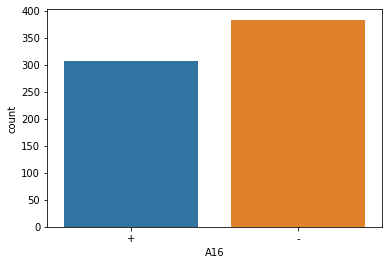

In [7]:
# Ensure Data is balanced
sns.countplot(x = cred['A16']);

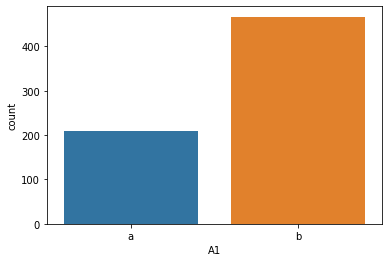

In [8]:
sns.countplot(x = cred['A1']);

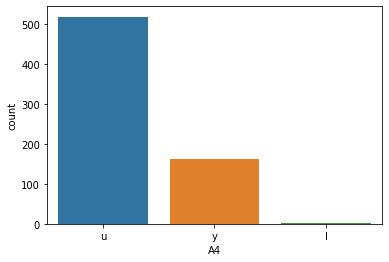

In [9]:
sns.countplot(x = cred['A4']);

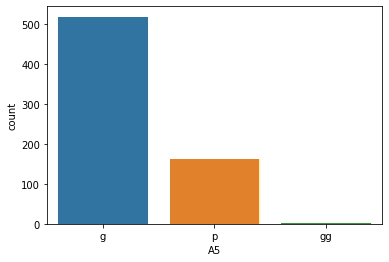

In [10]:
sns.countplot(x = cred['A5']);

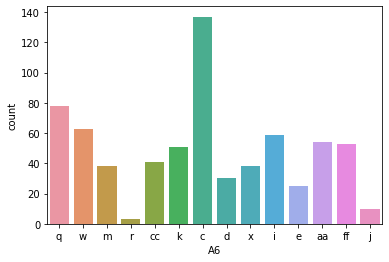

In [11]:
sns.countplot(x = cred['A6']);

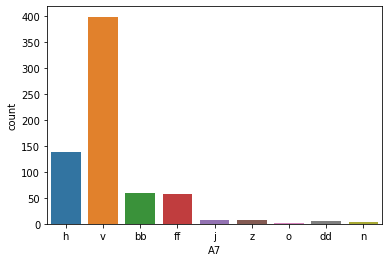

In [12]:
sns.countplot(x = cred['A7']);

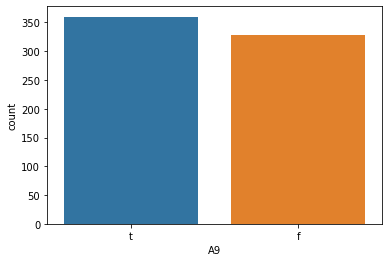

In [13]:
sns.countplot(x = cred['A9']);

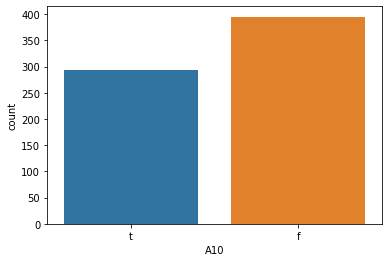

In [14]:
sns.countplot(x = cred['A10']);

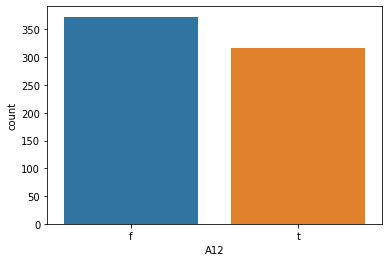

In [15]:
sns.countplot(x = cred['A12']);

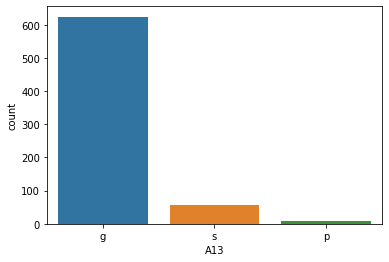

In [16]:
sns.countplot(x = cred['A13']);

## Numeric Data

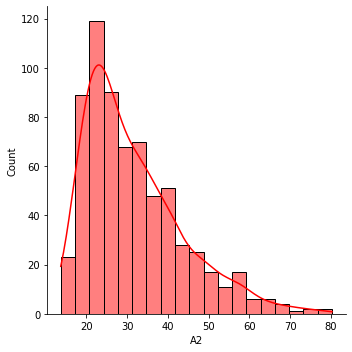

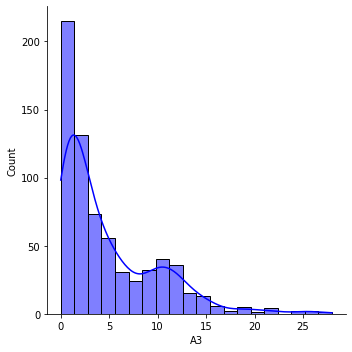

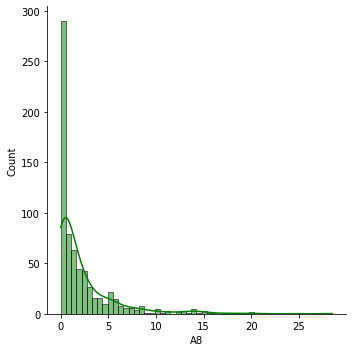

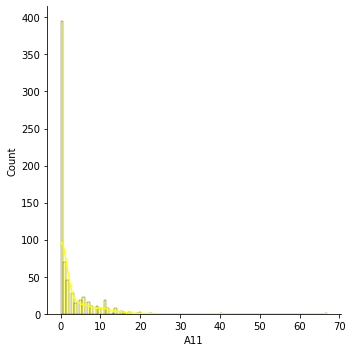

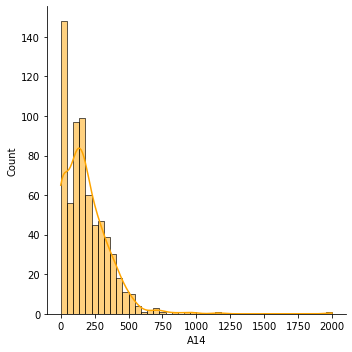

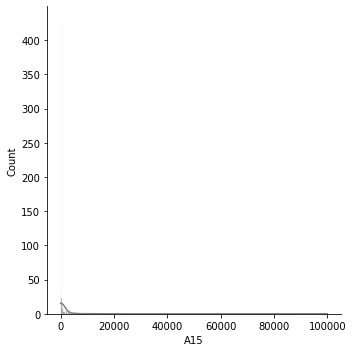

In [17]:
sns.displot(cred['A2'], kde=True, color="red");
sns.displot(cred['A3'], kde=True, color="blue");
sns.displot(cred['A8'], kde=True, color="green");
sns.displot(cred['A11'], kde=True, color="yellow");
sns.displot(cred['A14'], kde=True, color="orange");
sns.displot(cred['A15'], kde=True, color="gray");

## Outliers

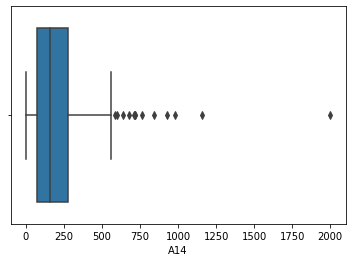

In [18]:
sns.boxplot(x = cred['A14']);

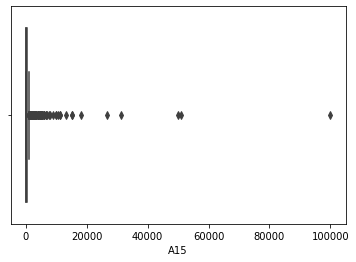

In [19]:
sns.boxplot(x = cred['A15']);

#Data Cleaning

In [20]:
# Filter out the numeric nulls with the mean
# Numeric Null Columns = A2, A14
cred['A2'].fillna(cred['A2'].mean(), inplace = True)
cred['A14'].fillna(cred['A14'].mean(), inplace = True)

# Fileter out the categorical nulls with the a random sample
# Categorical Null Columns = A1, A4, A5, A6, A7
from random import choice
cred['A1'].fillna(choice(A1_col), inplace = True)
cred['A4'].fillna(choice(A4_col), inplace = True)
cred['A5'].fillna(choice(A5_col), inplace = True)
cred['A6'].fillna(choice(A6_col), inplace = True)
cred['A7'].fillna(choice(A7_col), inplace = True)

In [21]:
# Remove some heavy outliers
cred = cred[cred['A15'] < 10000]
cred = cred[cred['A14'] < 600]

## Replacing Categorical to Numeric to view correlation

In [22]:
# True vs False -> 1 / 0
cred['A16'].replace(['+', '-'],[1,0], inplace = True)
cred['A9'].replace(['t', 'f'], [1,0], inplace = True)
cred['A10'].replace(['t', 'f'], [1,0], inplace = True)
cred['A12'].replace(['t', 'f'], [1,0], inplace = True)

# Other Catergorical -> 0, 1, 2 ... N
cred['A1'].replace(A1_col, A1_range, inplace = True)
cred['A4'].replace(A4_col, A4_range, inplace = True)
cred['A5'].replace(A5_col, A5_range, inplace = True)
cred['A6'].replace(A6_col, A6_range, inplace = True)
cred['A7'].replace(A7_col, A7_range, inplace = True)
cred['A13'].replace(A13_col, A13_range, inplace = True)



In [23]:
# View the correlation of the different features compared to A16
cred.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,1.000000,0.042591,-0.023211,0.057638,0.054060,-0.067086,-0.033419,0.109920,0.003516,-0.072458,-0.013645,0.040972,0.066293,0.094455,0.002020,-0.014378
A2,0.042591,1.000000,0.205583,-0.089581,-0.078164,0.154139,0.140596,0.381037,0.195969,0.082327,0.176954,0.055533,0.001748,-0.082701,0.082621,0.159320
A3,-0.023211,0.205583,1.000000,-0.107826,-0.120880,0.055295,0.055105,0.322989,0.260835,0.195236,0.295182,-0.012032,-0.150096,-0.294708,0.126328,0.218375
A4,0.057638,-0.089581,-0.107826,1.000000,0.979401,0.142538,0.033024,-0.061545,-0.167222,-0.201510,-0.120832,-0.006603,0.091146,0.019038,-0.103048,-0.174816
A5,0.054060,-0.078164,-0.120880,0.979401,1.000000,0.169572,0.027497,-0.071127,-0.178387,-0.207412,-0.123943,-0.024098,0.196548,0.020023,-0.105446,-0.156370
A6,-0.067086,0.154139,0.055295,0.142538,0.169572,1.000000,0.379836,-0.083660,-0.172163,-0.161527,-0.095150,-0.119202,0.051035,-0.109639,-0.017982,-0.195236
A7,-0.033419,0.140596,0.055105,0.033024,0.027497,0.379836,1.000000,-0.049704,-0.156198,-0.027947,-0.015715,-0.044256,-0.018171,-0.138674,-0.033248,-0.144409
A8,0.109920,0.381037,0.322989,-0.061545,-0.071127,-0.083660,-0.049704,1.000000,0.344481,0.233051,0.313265,0.138263,-0.041587,-0.095248,0.095779,0.325987
A9,0.003516,0.195969,0.260835,-0.167222,-0.178387,-0.172163,-0.156198,0.344481,1.000000,0.434885,0.383645,0.096816,-0.135609,-0.065617,0.225531,0.726920
A10,-0.072458,0.082327,0.195236,-0.201510,-0.207412,-0.161527,-0.027947,0.233051,0.434885,1.000000,0.574138,0.029008,-0.234557,-0.075661,0.243569,0.463079


# Create the model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Drop the Columns that didnt provide much correlation to A16
y = cred['A16']
X = cred.drop(['A16','A1', 'A12', 'A13', 'A14', 'A7', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'], axis = 1)

# Create the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size = 0.25)
dt = DecisionTreeClassifier(random_state = 0, max_leaf_nodes = 5)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

## Evaluate Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


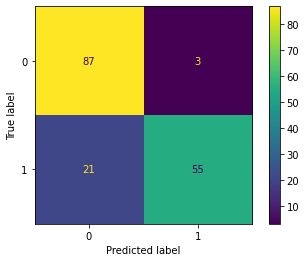

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test) ;
plt.show();

In [26]:
# Various Scores
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.95      0.72      0.82        76

    accuracy                           0.86       166
   macro avg       0.88      0.85      0.85       166
weighted avg       0.87      0.86      0.85       166



## Visual

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


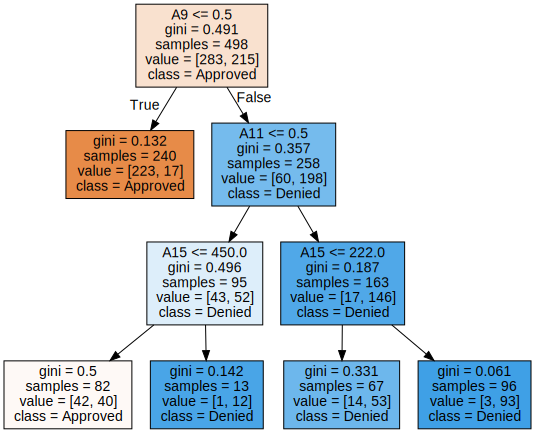

In [28]:
!pip install graphviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt,
                                filled = True,
                                feature_names = X.columns,
                                class_names = ['Approved', "Denied"])
graphviz.Source(dot_data,format="png") 

Decision Tree Model Description

*  The model here is a basic decision tree that is created by using all of the columns with correlation to A16 around 0.3 and above.
*  The max number of leaf nodes is 5 so there seems to be 4 main splits/decisions that groups the class into approved or denied in terms of credit approval


How we picked the initial parameters
*   Again, as stated above the parameters we used were based on the correlation matrix and we ended up chosing features that were around 0.3 and above to try and get the most out of them




### Problem 2 - K-means (10 points)
* Use the Ecoli dataset at https://archive.ics.uci.edu/ml/datasets/Ecoli
* Ignore the label and create clusters using k values between 4 and 6.
* Pick the best k value and explain why you picked it
* Show any calculations you used to pick the best cluster
* Create two visualization
    * One colors the nodes with the cluster membership
    * The other colors the nodes based on the actual label
* Grading criteria: Adequately describe how to pick the best cluster and successful create the required visualizations

## Reading in Data

In [29]:
ecoli = pd.read_csv(filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data", delim_whitespace=True, header= None)
ecoli_labels = ['sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
ecoli.columns = ecoli_labels
ecoli['class'].replace(ecoli['class'].unique(), [0,1,2,3,4,5,6,7], inplace = True)
ecoli.head()

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


## Exploring Correlations

In [31]:
ecoli.corr()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
mcg,1.000000,0.454805,0.146841,0.070266,0.220699,0.396979,0.167086,0.642482
gvh,0.454805,1.000000,0.043804,0.018466,0.069824,0.173492,-0.120199,0.669773
lip,0.146841,0.043804,1.000000,0.311951,0.070190,0.095788,-0.057570,0.162742
chg,0.070266,0.018466,0.311951,1.000000,-0.044726,-0.007654,-0.052188,0.017670
aac,0.220699,0.069824,0.070190,-0.044726,1.000000,0.279482,0.252675,0.119870
alm1,0.396979,0.173492,0.095788,-0.007654,0.279482,1.000000,0.809324,0.218859
alm2,0.167086,-0.120199,-0.057570,-0.052188,0.252675,0.809324,1.000000,-0.108573
class,0.642482,0.669773,0.162742,0.017670,0.119870,0.218859,-0.108573,1.000000


In [32]:
# Drop columns that didnt provide much info
y = ecoli['class']
X = ecoli.drop(['lip','chg', 'aac', 'alm1', 'alm2', 'sequence', 'class'], axis = 1)

## Create the model with 4 clusters

In [33]:
from sklearn.cluster import KMeans

# Drop columns that didnt provide much info
y = ecoli['class']
X = ecoli.drop(['lip','chg', 'aac', 'alm1', 'alm2', 'sequence', 'class'], axis = 1)

# Choose number of K
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state = 0) 

# Fit and predict
labels = kmeans.fit_predict(X)
correct_labels = sum(y == labels)

## Evaluation

In [34]:
print("%d out of %d samples correctly labeled." % (correct_labels, y.size))
print('Accuracy: {0:0.2f}'. format(correct_labels/float(y.size)))

96 out of 336 samples correctly labeled.
Accuracy: 0.29


## Visualizations

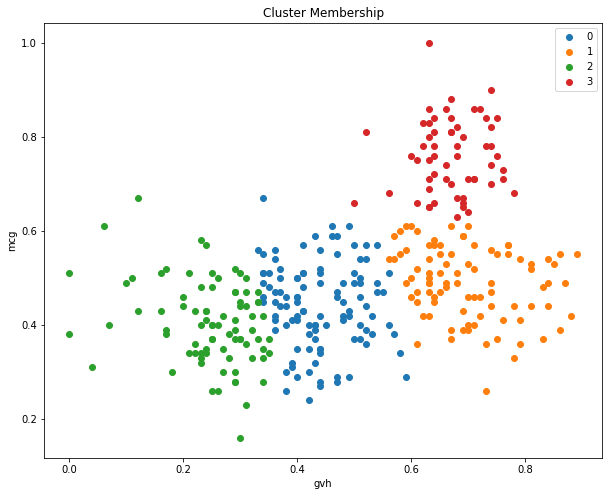

In [35]:
# Plot the data points based on the cluster membership
u_labels = np.unique(labels)
plt.figure(figsize = (10,8))
for i in u_labels:
    filter = X[labels == i]
    plt.scatter(filter.iloc[:, 0] ,filter.iloc[:, 1])
plt.legend(np.arange(0,num_clusters,1))
plt.title("Cluster Membership")
plt.xlabel("gvh")
plt.ylabel("mcg")
plt.show();

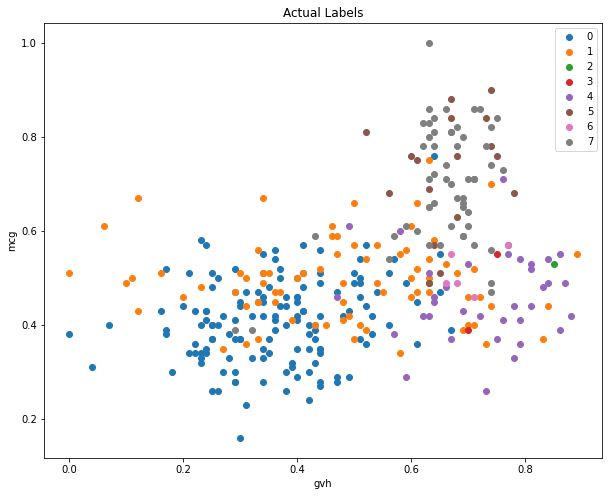

In [36]:
# Plot the data based on the actual labels
actual = np.unique(ecoli['class'])
plt.figure(figsize = (10,8))
for i in actual:
  plt.scatter(X[ecoli["class"] == i].iloc[:,0], X[ecoli['class'] ==i].iloc[:,1])
plt.legend(np.arange(0,8,1))
plt.title("Actual Labels")
plt.xlabel("gvh")
plt.ylabel("mcg")
plt.show();

Provide an explanation of your model:


*   The model we created was a K-means clustering with 4 clusters as asked to do in the instructions.
*   We did some base level exploration of the correlation matrix to quickly figure some features to use within the model
* It only managed to predict around 1/4 of the time with the k = 4
* The visualizations did provided some intersting info about how overlapped the actual labels are so maybe this isnt the best method to classify them
* Lastly if we had to pick an optimal K we'd would think that it should be 8 as there are 8 classes of ecoli we want to identify, no calucations simply domain knowledge. However, having 8 clusters significaly rudece the correctly predicted %



### Problem 3 - Support Vector Machines (10 points)
* Use the Iris trainging set
* Explore the data to find the best two features to use
    * We are mostly doing this so we can visualize the results
* Split the data set into 80% training and 20% testing
* Create a SVM to model the data
* Create a visualization that shows the line and the margins
* Creat anonther visualization that shows the decision surface
    * Do not include the test data points
    * Randomly select 10 test points and add them to the visualization. Color them based on their label
    * Are the random test points consistently on the correct side of the line?
* Predict the label for ALL of the test data 
    * Show a confusion matrix
    * Calculate the F1 measure
* Grading criteria: 
    * SVM graphically appears to correctly to use a reasonable line
    * F1 measure is consistent with what we showed in class

## Reading in Data

In [37]:
from sklearn.datasets import load_iris

Iris = load_iris()
X = Iris.data
y = Iris.target

iris = pd.DataFrame(X,columns=Iris.feature_names)
iris['Label']=y
iris['Species']=iris['Label'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'})

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


## Exploring Correlations

In [38]:
# Petal length and Petal width have extremly high correlation with label
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Label,0.782561,-0.426658,0.949035,0.956547,1.000000


## Create the model

In [39]:
# Drop the Columns that didnt provide much correlation to label
y = iris['Label']
X = iris.drop(['sepal length (cm)', 'Label', 'Species', 'sepal width (cm)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size = 0.2)

#Creating the SVM model
from sklearn import svm

model = svm.SVC(kernel = 'linear', random_state = 1)

#Fit the model for the data
clf = model.fit(X_train, y_train)

#Producing a result
pred = clf.predict(X_test)

## Evaluation

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


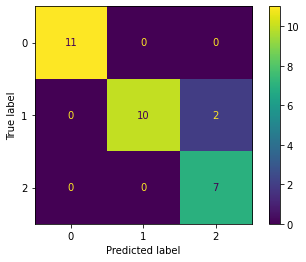

In [41]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show();

## Visualizations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


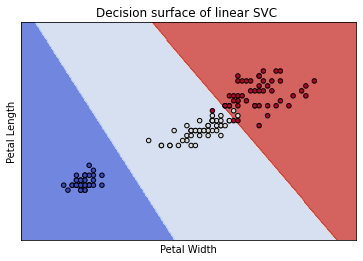

In [42]:
# Functions to create decision surfaces
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Creating the plot
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Petal Length')
ax.set_xlabel('Petal Width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

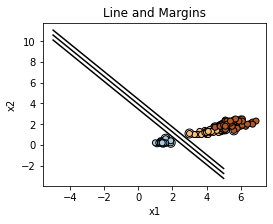

In [43]:
# Get the seperating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)

# Build the line for yy using xx and the model
yy = a * xx - (clf.intercept_[0]) / w[1]

# Calculate the margine using coefficient in the model
## Sq Root of Sum of squares
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Creating the plot
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Line and Margins')
plt.show()

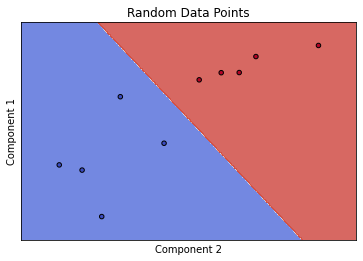

In [44]:
# Create 10 random data points and fit them
X = np.r_[np.random.randn(5, 2) - [2, 2], np.random.randn(5, 2) + [2, 2]]
Y = [0] * 5 + [1] * 5
model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# Functions to create decision surfaces
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Random Data Points')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Creating the plot
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


Explanation of your model:


*   The model we created was a SVM with only the two most explanatory features, petal width and length
*   We evaluated the recall, f1, and support which had extremly high results
* The confusion matrix revealed that only 2 species we're missed
* For the visualizations, the decision line surface split the random 10 data points into their own classes and for the margin and lines it seem pretty accurate. However we couldn't figure out how to plot 2 different margins since there are 3 class
